# Data Science Project
This is the notebook that is assosiated with TTDS report, and what wil be used to create all the fancy python graphs\
We first need to import the modules/libaries that we are going to use in this project

In [1]:
import pandas as pd
from pandas import Timestamp
import numpy as np
import matplotlib.pyplot as plt
import datetime
# Sets the size for the visulaizations, makes sure they are big enough to be copied into Word
plt.rcParams["figure.figsize"] = (20,10)
print("Imported needed modules!")

Imported needed modules!


Now we want to import the data from the CSV file:

In [3]:
flow_data = pd.read_csv("./Data/data.csv", delimiter=',')
five_minute_chunk_data = pd.read_csv("./Data/traffic_5minutes.csv",delimiter=",")
print("All data open!")

All data open!


## Data sanitisation
Now that we have the data we need to sanatise it to make sure its all in the format that we want, we do this for both incomming and outgoing. Both sections of code are the same. The idea is to replace the Sensor column with a time that is derived from the start and and end timestamp

In [ ]:
# Main CSV file
sanatised_flow_data = flow_data.to_numpy()
for i in range(0,len(sanatised_flow_data)):
    # Extract the HH:MM:SS:fff and replace the data in the sensor column
    sanatised_flow_data[i][11] = sanatised_flow_data[i][10].split("T")[1].split(".")[0].split(':')
# convert Numpy Array back to Panads Data 
sanatised_flow_data = pd.DataFrame(sanatised_flow_data,columns=["sIP","dIP","sPort","dPort","protocol","packets","Bytes","flags","stime","duration","eTime","TimeStamp"])
sanatised_flow_data = sanatised_flow_data.sort_values("TimeStamp")
#flow_data.head(5)

## Fancy Graphs time!
Now we have the data in the format that we want we can have alook at some of the visulasations
### 1 - Top TCP Port

In [ ]:
#plt.hist(internal[internal["protocol"]=="6"]["dPort"])
sanatised_flow_data.loc[sanatised_flow_data["protocol"] == 6]['sPort'].hist()
plt.xlabel('TCP Port Number')
plt.ylabel('Frequency')

### 2 - Top used UDP Port Numbers

In [ ]:
#plt.hist(internal[internal["protocol"]=="6"]["dPort"])
sanatised_flow_data.loc[sanatised_flow_data["protocol"] == 17]['sPort'].hist()
plt.xlabel('UDP Destination Port')
plt.ylabel('Frequency')

### 3- Total number of Bytes recorded by the Sensor in 15 minute intervals
Show the number of bytes per 10 minutes

In [ ]:
plt.plot(bytes_time_in["Hour"],bytes_time_in["TotalBytes"],label="Inbound")
#plt.xticks(rotation=90)
#plt.grid()
#plt.plot(five_minute_chunk_data["Date"],five_minute_chunk_data["Bytes"])
#plt.xlabel('Time')
#plt.ylabel('Kilobytes')
plot_data(five_minute_chunk_data["Date"],five_minute_chunk_data["Bytes"])

## Machine Learning Approch
The most useful thing to predict would be future traffic, as while port numbers would be useful to know in a breach if they are using suspicous port numbers they are likely to be blocked by the firewall, so its likely that the graphs we have would stay similar to they are now.
The volume of traffic is most likely to be an indicator.

In [4]:
# From the 53 rows of data we only want to use the fisrt 40 rows to train the model
ml_train_data = five_minute_chunk_data[0:40:1]
# The rest will be the test data
ml_test_data = five_minute_chunk_data[40::]
# We also want to change the time stamps, they aren't really going to work with ML so we can just use numbers
kilobytes = ml_train_data["Bytes"].to_numpy()
timestamp = list(range(0,len(kilobytes)))

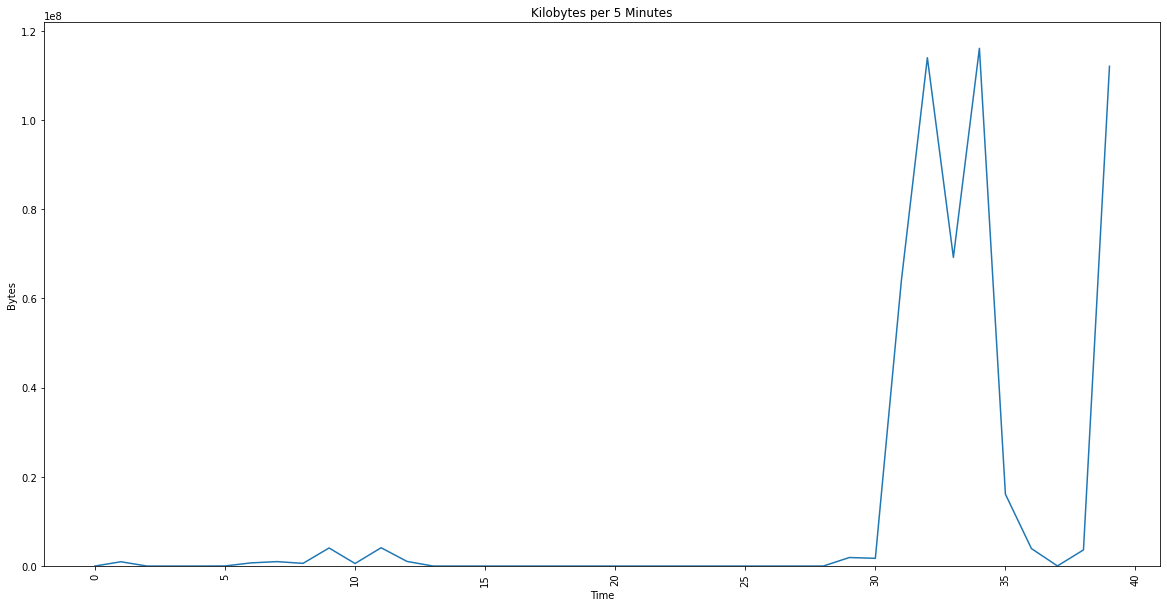

In [18]:
plot_data(range(0,len(timestamp)+1), kilobytes)

We can now start to plot our line of best fit, we can start with a polynomial of 1 just to see if it works:

In [51]:
coefficients = np.polyfit(range(0,len(timestamp)),kilobytes,1) # Ploynomail
poly = np.poly1d(coefficients)
print(f"The error with our calculated line of best fit is: {np.sum((poly(timestamp)-kilobytes)**2)}")

The error with our calculated line of best fit is: 3.1754691671235056e+16


We can now plot this line of best fit, although we need to calulate the points for it:

(0.0, 121903027.1865)

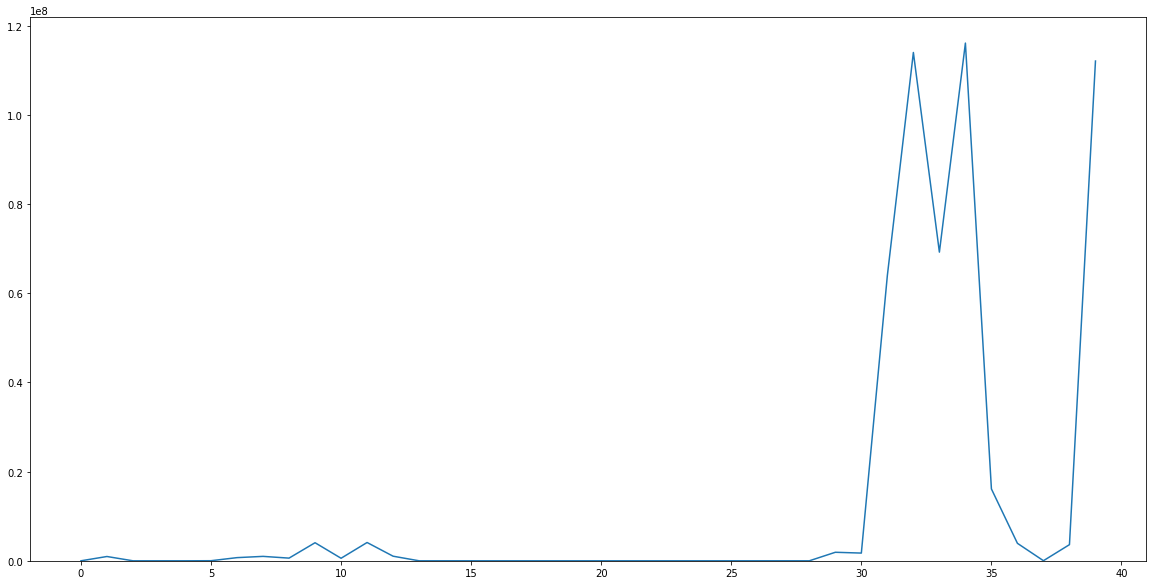

In [53]:
new_x = np.linspace(timestamp[0],timestamp[-1])
new_y = poly(new_x)
plt.plot(timestamp,kilobytes,label="Data")
p
# We specify this so we dont see anything below 0...We can't have negative number of bytes passing the sensor anyway
plt.ylim(bottom=0) 

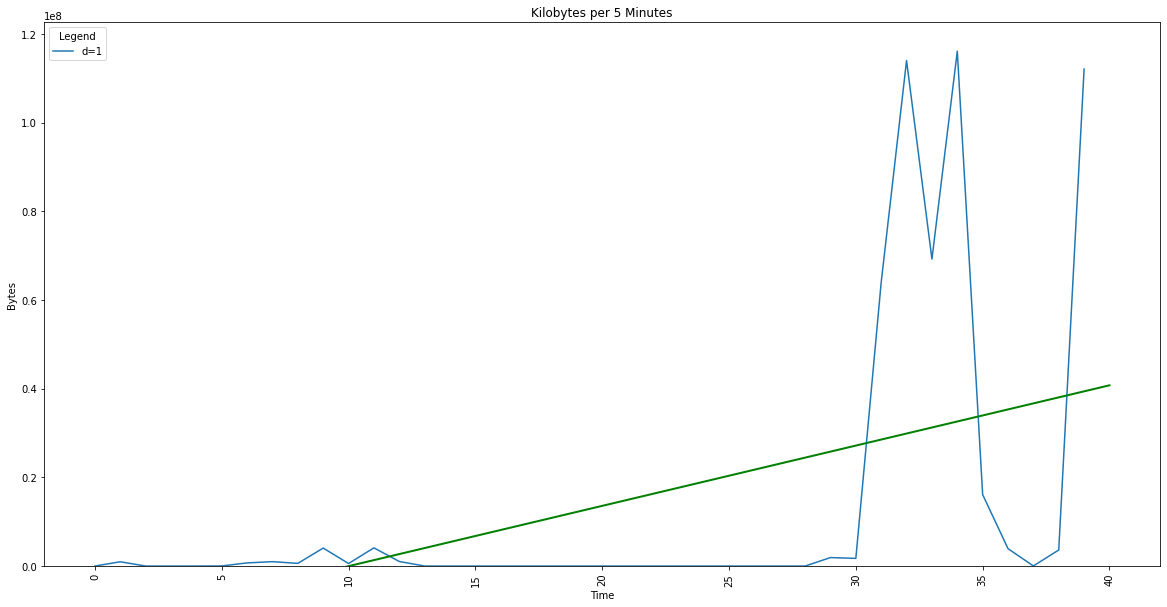

In [29]:
num_minutes = list(range(0,len(timestamp)))
fp2 = np.polyfit(num_minutes,kilobytes,2)
f2 = np.poly1d(fp2)
fp3 = np.polyfit(num_minutes,kilobytes,3)
f3 = np.poly1d(fp3)
fp4 = np.polyfit(num_minutes,kilobytes,4)
f4= np.poly1d(fp4)
plot_data(range(0,len(kilobytes)+1),kilobytes,[f1])

## Test Code Area
This is a cell that I am going to use to test code

In [22]:
fp1(kilobytes)

TypeError: 'numpy.ndarray' object is not callable